# Telco Churn Analysis 
**Dataset Info** : Sample Data Set containing Telco customer data and showing customers left last month

In [2]:
# Import the required libraries
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.ticker as mtick  # For customizing plot tick formats
import matplotlib.pyplot as plt  # For creating plots and visualizations
%matplotlib inline 
# Enable inline plotting in Jupyter notebooks

#

**Load the data file**

In [5]:
telco_base_data = pd.read_csv(r"D:\Data Analytics\PORTFOLIO PROJECTS\End to End Machine Learning Project\materials\WA_Fn-UseC_-Telco-Customer-Churn.csv")

#

**Look at the top 5 record of data**

In [8]:
# Display the first 5 rows of the telco_base_data DataFrame to examine its structure and content
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#

**Check the attributes of data**

In [11]:
# Get the dimensions of the telco_base_data DataFrame
# Returns a tuple with (number of rows, number of columns)
telco_base_data.shape

(7043, 21)

In [12]:
# Get all column names from the telco_base_data DataFrame and return as a numpy array
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [13]:
telco_base_data.dtypes     # checking data type 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
telco_base_data.describe()             # checking descriptive statistics 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitien being a categorical column doent give proper distribution (0,1 values)

75% Customers have tenure less than 55 month

Average Monthly Charges are USD 64.761 

About 25% people pay more than USD 89.850 per month

In [16]:
# Count the number of occurrences for each value in the 'Churn' column
# This shows the distribution of customers who churned vs those who didn't
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
# Calculate the percentage distribution of the 'Churn' variable
# - value_counts() counts occurrences of each unique value
# - normalize=True converts counts to proportions (0-1)
# - multiply by 100 to convert to percentages
# - round(2) rounds the results to 2 decimal places
(telco_base_data['Churn'].value_counts(normalize=True) * 100).round(2)


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

- “The dataset is characterized by an imbalanced distribution of classes, as evidenced by a skewed class proportion (e.g., 73% ‘No’ vs. 27% ‘Yes’ churn). Therefore, we analyze the data with respect to other features while keeping the target variable separate to gain meaningful insights into factors influencing churn.”

In [19]:
# Display a concise summary of the dataframe structure
# This includes information about index, columns, non-null values, data types and memory usage
# Using verbose=True to show the full output with all columns (helpful since we have many columns)
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


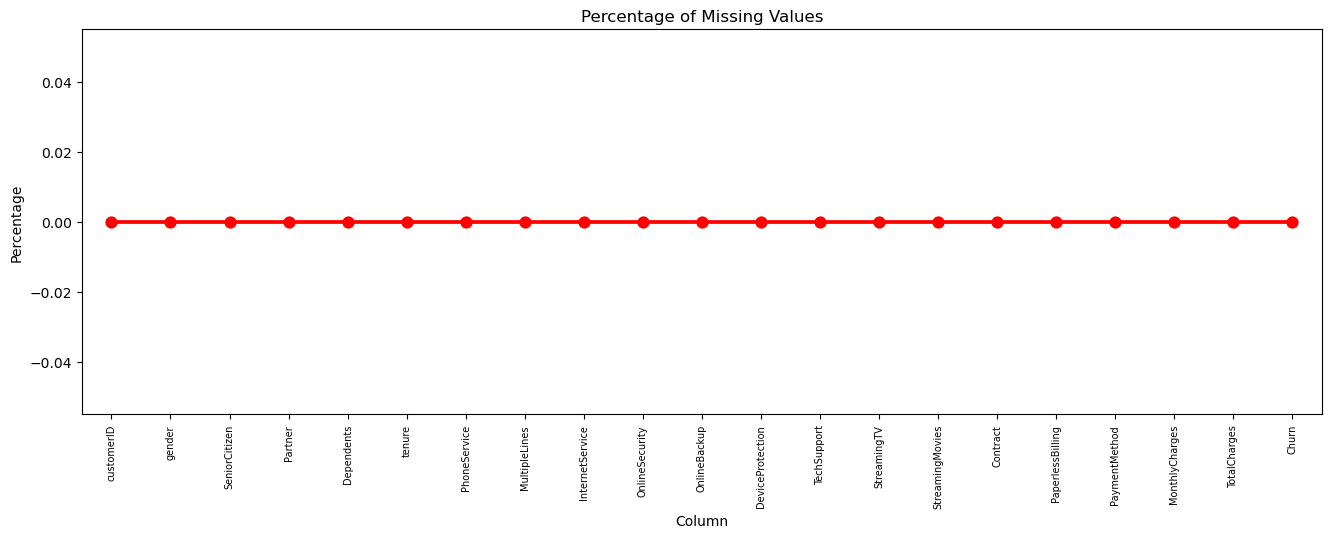

In [20]:
# Calculate missing percentage
missing = pd.DataFrame({
    'column': telco_base_data.columns,
    'missing_pct': telco_base_data.isnull().sum() * 100 / telco_base_data.shape[0]
})

# Plot
plt.figure(figsize=(16,5))
sns.pointplot(x='column', y='missing_pct', data=missing, color='red')
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column")
plt.show()

### Missing Data - Initial Intuition

- In this dataset, we found **no missing data** in any columns.

 **General Thumb Rules for handling missing data:**
  - For features with a small number of missing values:
    - You can fill missing values using methods like regression prediction or by imputing with the mean/median.
  - For features with a large percentage of missing values:
    - It's usually better to drop those columns since they provide little useful information.
  - There's no strict rule for dropping columns based on missing data percentage, but commonly columns with more than 30-40% missing values are considered for removal.
  - However, use caution. For example, in a customer churn dataset, the 'TotalCharges' column might be missing for new customers who haven’t been billed yet.  
    Although missing, this column still contains valuable information and should not be dropped blindly.  
    So, decisions should always be context-aware and data-driven.



**Check for duplicates**

In [23]:
# Count the number of duplicate rows in the telco_base_data DataFrame
num_duplicates = telco_base_data.duplicated().sum()
# Print the result showing how many duplicate entries were found
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#

# Data Cleaning

**1.** Creating a copy of base data

In [27]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount.

In [29]:
# Convert TotalCharges column to numeric format, replacing non-convertible values with NaN
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
# Count the number of null values in each column of the telco_data dataframe
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [31]:
# Display rows where TotalCharges is null (missing values)
# This filters the telco_data DataFrame to show only records with null TotalCharges
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [34]:
# Removing rows with missing values in the 'TotalCharges' column
# inplace=True modifies the original DataFrame without creating a copy
telco_data.dropna(subset=['TotalCharges'], inplace=True)

# Display the first 5 rows of the cleaned DataFrame to verify changes
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**5.** Divide customers into bins based on tenure

In [36]:
# Get the max tenure 
print(telco_data['tenure'].max())

72


In [37]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  # Create labels for each 12-month range (e.g., "1 - 12", "13 - 24", etc.)

# Create a new categorical column 'tenure_group' by binning the 'tenure' values
# range(1, 80, 12) creates bin edges: 1, 13, 25, 37, 49, 61, 73
# right=False means intervals are closed on the left and open on the right [1,13), [13,25), etc.
# labels parameter assigns the previously created labels to each bin
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)


In [38]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [40]:
# Drop the 'customerID' column as it's just an identifier and not useful for analysis
# Also drop the 'tenure' column (likely removed for specific analysis purposes)
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
# Display the first 5 rows of the dataframe after dropping columns
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**7.** Convert Churn to 0/1

In [42]:
telco_data['Churn'] = telco_data['Churn'].map({'Yes':1, 'No':0})
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [43]:
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

#

## Data Exploration


###

# 1. Univariate Analysis
In this section, we will analyze individual variables (numerical & categorical) 
to understand their distribution, outliers, and balance.


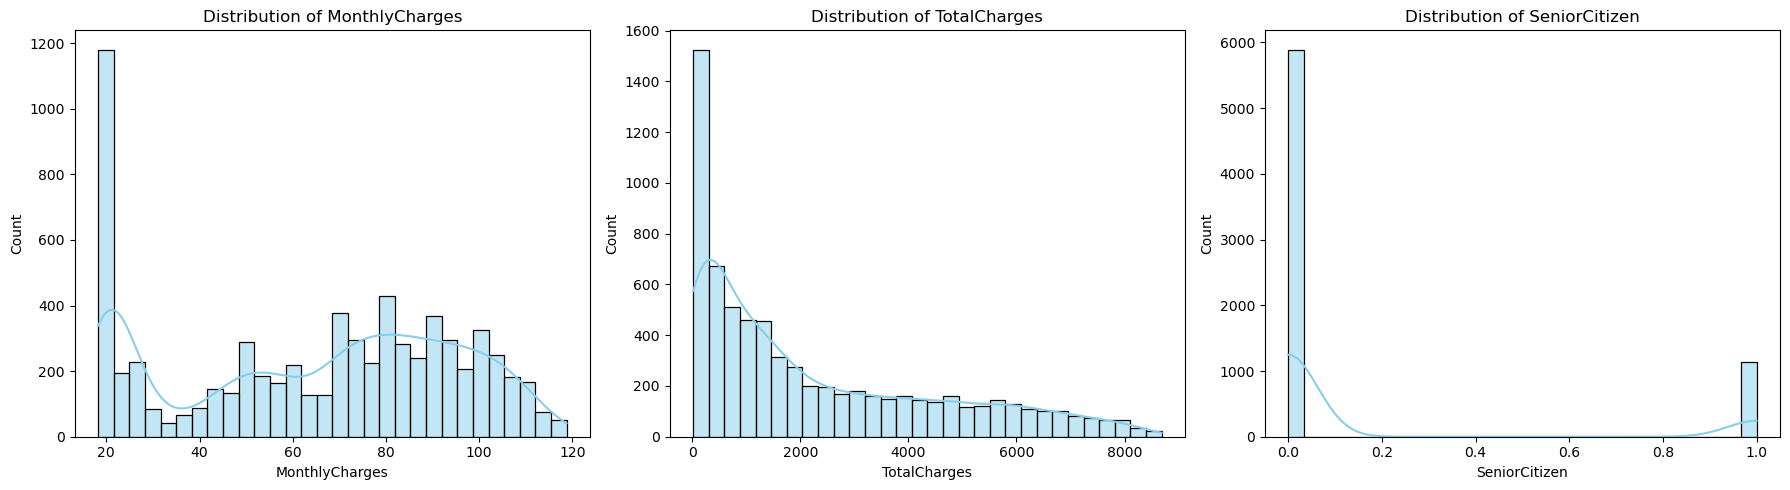

In [48]:
# Numerical variables

num_cols = ["MonthlyCharges", "TotalCharges", "SeniorCitizen"]

plt.figure(figsize=(18,5))  
for i, col in enumerate(num_cols, 1):  
    plt.subplot(1, 3, i)  
    sns.histplot(telco_data[col], kde=True, bins=30, color="skyblue") 
    plt.title(f"Distribution of {col}")  
plt.tight_layout()  
plt.show()  


## 1-a. Numerical Variables

### MonthlyCharges
- The distribution shows a clear peak around 20, indicating a large number of customers on low-tier plans.
- Additional peaks are observed between 40 and 80, suggesting most customers subscribe to mid-range plans.
- Counts decrease sharply beyond 100, revealing relatively few premium customers.
- Overall, the distribution is slightly right-skewed.

### TotalCharges
- TotalCharges exhibits a strong concentration of customers at the lower end (0–500), reflecting new or low-spending customers.
- Frequency gradually declines as charges increase, forming a long right tail that extends up to ~8000.
- This indicates a smaller segment of long-term or high-spending customers.

### SeniorCitizen
- The SeniorCitizen variable is binary, with the majority of customers being non-seniors (0) and a smaller fraction being seniors (1).
- This highlights that the customer base is predominantly younger adults.

**Observation:** Most customers are on low-to-mid-tier plans, total spending is concentrated at lower values, and non-seniors form the majority demographic.


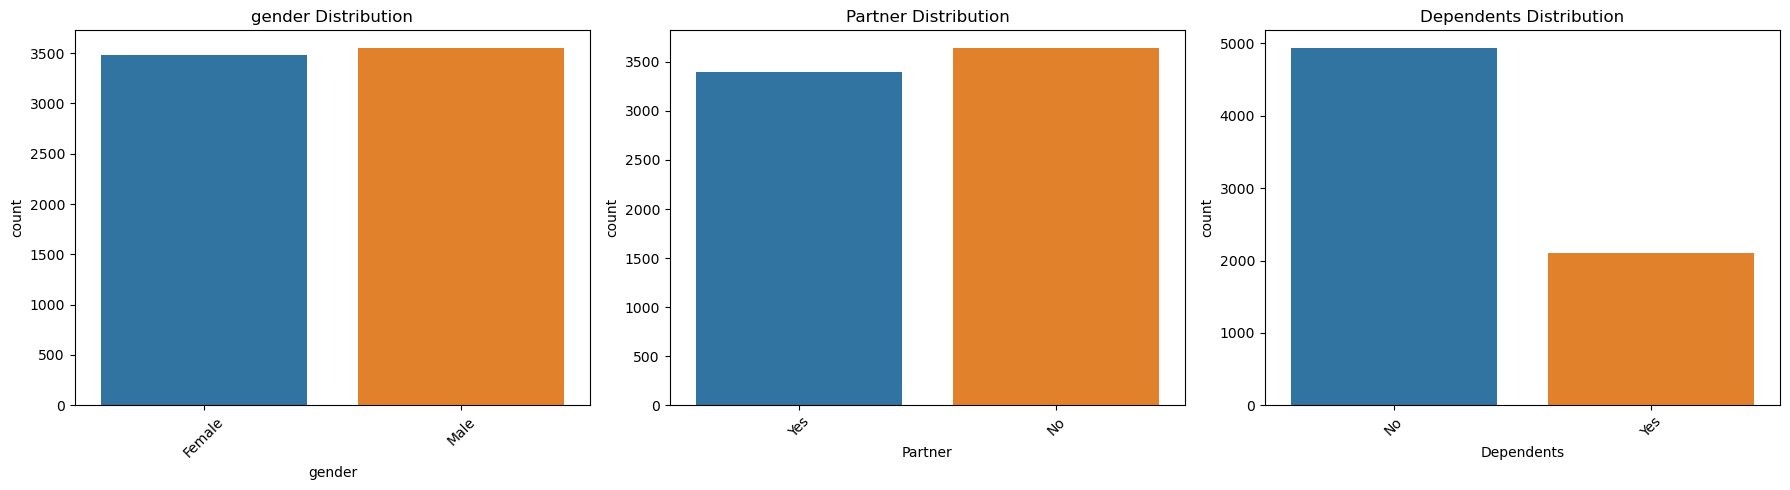

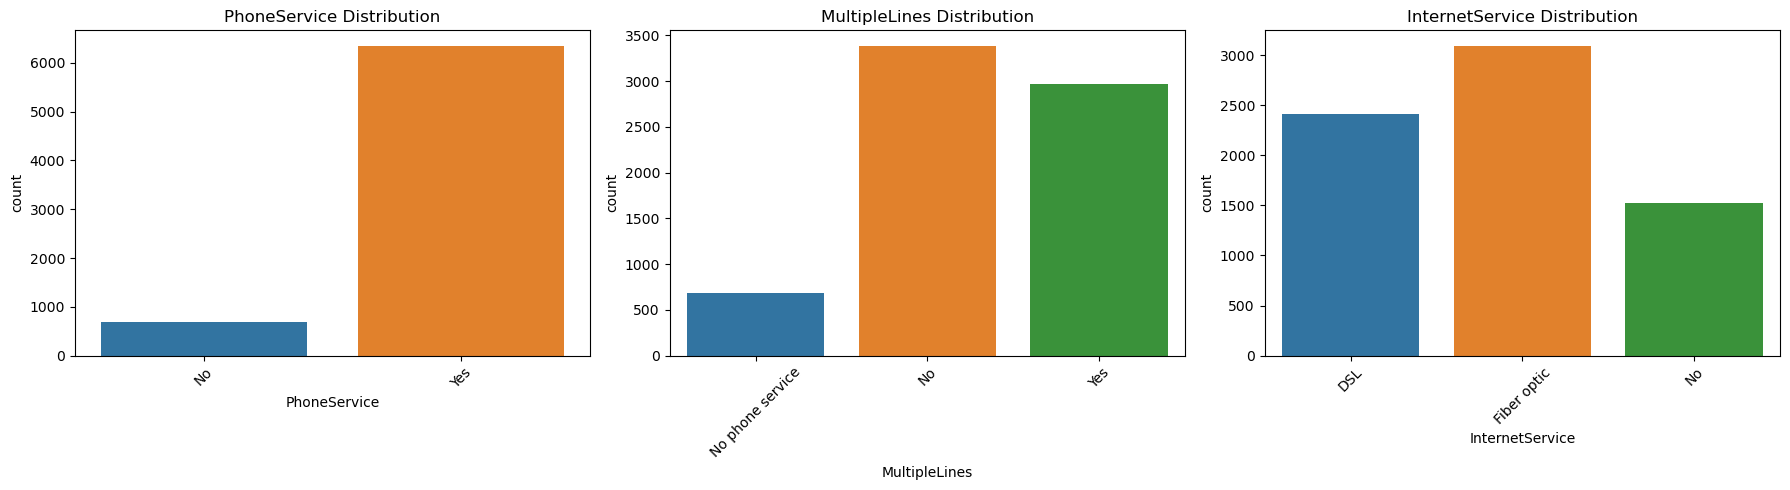

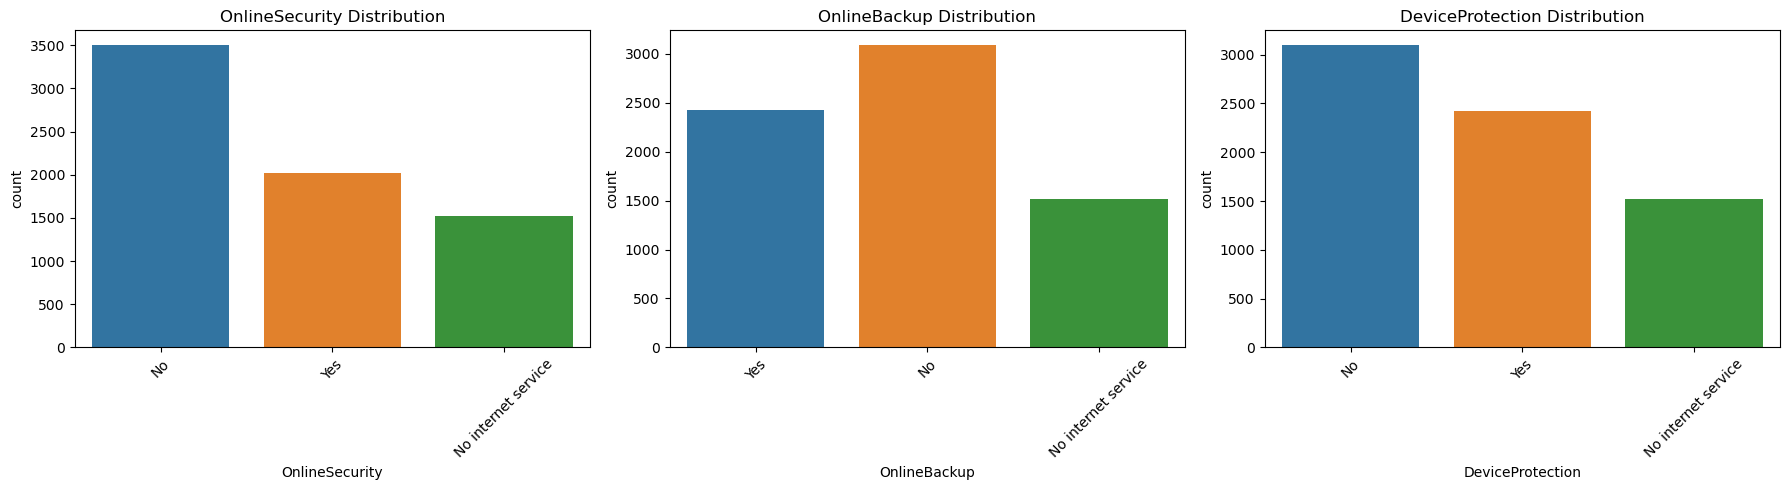

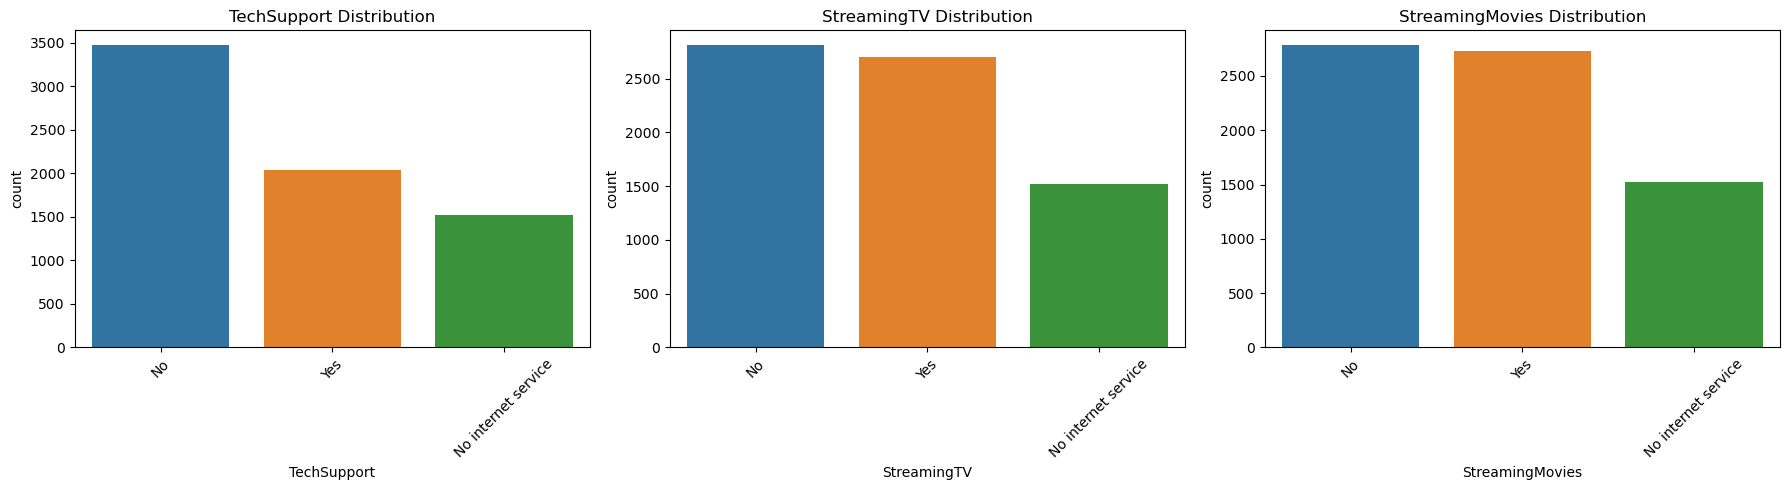

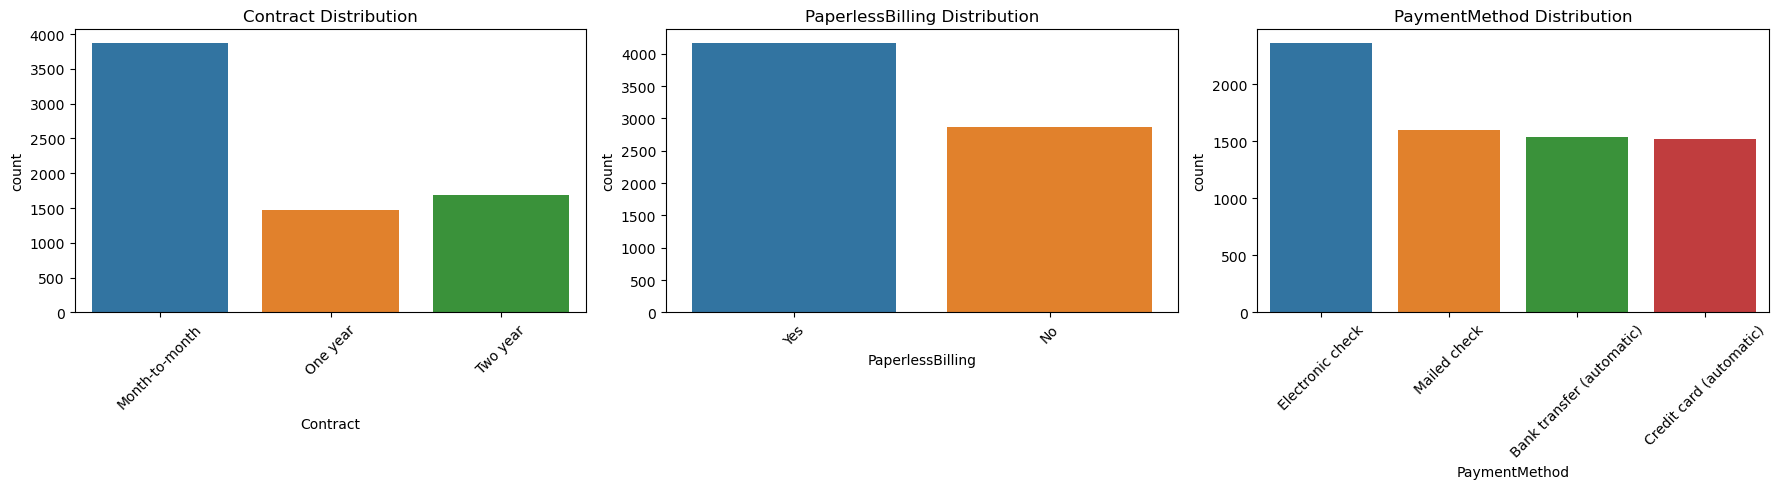

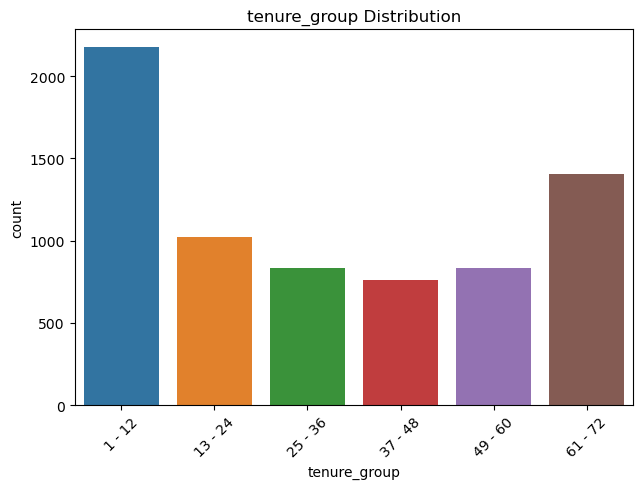

In [50]:
# Categorical Variables
def plot_categorical_variables(data, categorical_columns, plots_per_row=3):
    for i in range(0, len(categorical_columns), plots_per_row):
        plt.figure(figsize=(6 * plots_per_row, 5))
        for j, col in enumerate(categorical_columns[i:i+plots_per_row], 1):
            plt.subplot(1, plots_per_row, j)
            sns.countplot(x=col, data=data, hue=col, legend=False)
            plt.xticks(rotation=45)
            plt.title(f"{col} Distribution")
        plt.tight_layout()
        plt.show()

# Example usage:
cat_cols = ["gender", "Partner", "Dependents", "PhoneService",
            "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport",
            "StreamingTV", "StreamingMovies", "Contract",
            "PaperlessBilling", "PaymentMethod", "tenure_group"]

plot_categorical_variables(telco_data, cat_cols)


## 1-b. Categorical Variables

### Gender
- The distribution is fairly balanced between male and female customers.

### Partner
- Slightly fewer customers have a partner than those who do not, indicating a larger single customer base.

### Dependents
- Most customers do not have dependents, while a smaller portion do.

### PhoneService
- The majority of customers have PhoneService; only a few do not.

### MultipleLines
- Among customers with PhoneService, roughly half have multiple lines, and the other half have only one.

### InternetService
- Fiber optic service is the most common, followed by DSL, while some customers do not have internet.

### OnlineSecurity
- Few customers have OnlineSecurity, while most do not.

### Contract
- Month-to-month contracts are the most common, followed by one-year and two-year contracts.

### PaymentMethod
- Electronic payment methods appear more common than mailed checks.

### Other Optional Services (OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
- Most customers do not subscribe to these optional services; a smaller portion does.

**Observation:** The customer base consists mainly of independent adults, prefers month-to-month contracts and electronic payments, and optional services have low adoption.


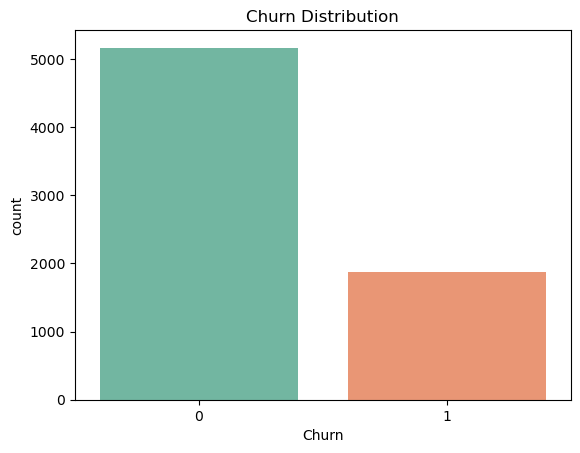

Churn rate (%) :
 Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [52]:
# target variable
sns.countplot(x="Churn", data=telco_data, palette="Set2", hue="Churn", legend=False)
plt.title("Churn Distribution")
plt.show()

# Print Churn percentage
print("Churn rate (%) :\n", telco_data["Churn"].value_counts(normalize=True) * 100)



## 1-c. Target Variable: Churn
- The Churn distribution shows that most customers are retained, while a smaller portion have churned.
- This will be the target variable for prediction in churn analysis.

**Observation:** The dataset is imbalanced with more retained customers than churned customers, which may need consideration in modeling.

#

# 2. Bivariate Analysis

#

## 2-a Numerical vs Target

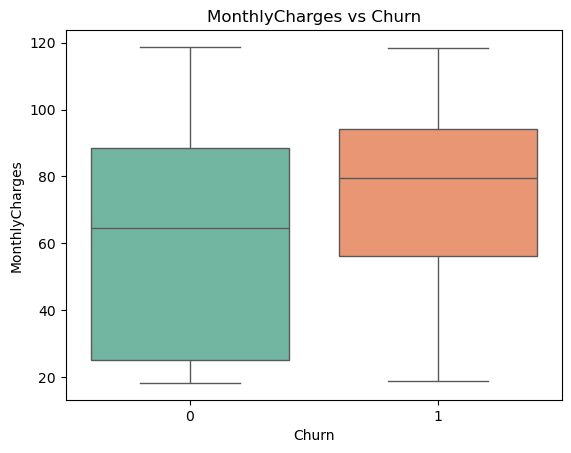

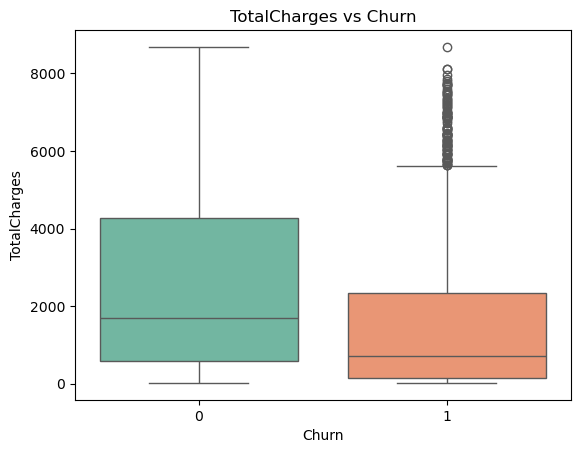

In [58]:
# MonthlyCharges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=telco_data, hue="Churn", palette="Set2", legend=False)
plt.title("MonthlyCharges vs Churn")
plt.show()

# TotalCharges vs Churn
sns.boxplot(x="Churn", y="TotalCharges", data=telco_data, hue="Churn", palette="Set2", legend=False)
plt.title("TotalCharges vs Churn")
plt.show()


**Plots:** Boxplots for `MonthlyCharges` and `TotalCharges` vs `Churn`.

**Inferences:**
- **MonthlyCharges vs Churn**
  - Customers who churn (`Churn=1`) tend to have slightly **higher monthly charges** than retained customers (`Churn=0`).  
  - Median and quartiles indicate a small but noticeable difference in distribution.
- **TotalCharges vs Churn**
  - Customers who have churned often have **lower total charges**, indicating they are newer or have spent less overall.  
  - Retained customers have higher total charges on average, showing a positive relationship between tenure and retention.  

**Observation:**  
Numerical features give insight into **spending behavior differences** between churners and retained customers.


## 2-b Categorical vs Target

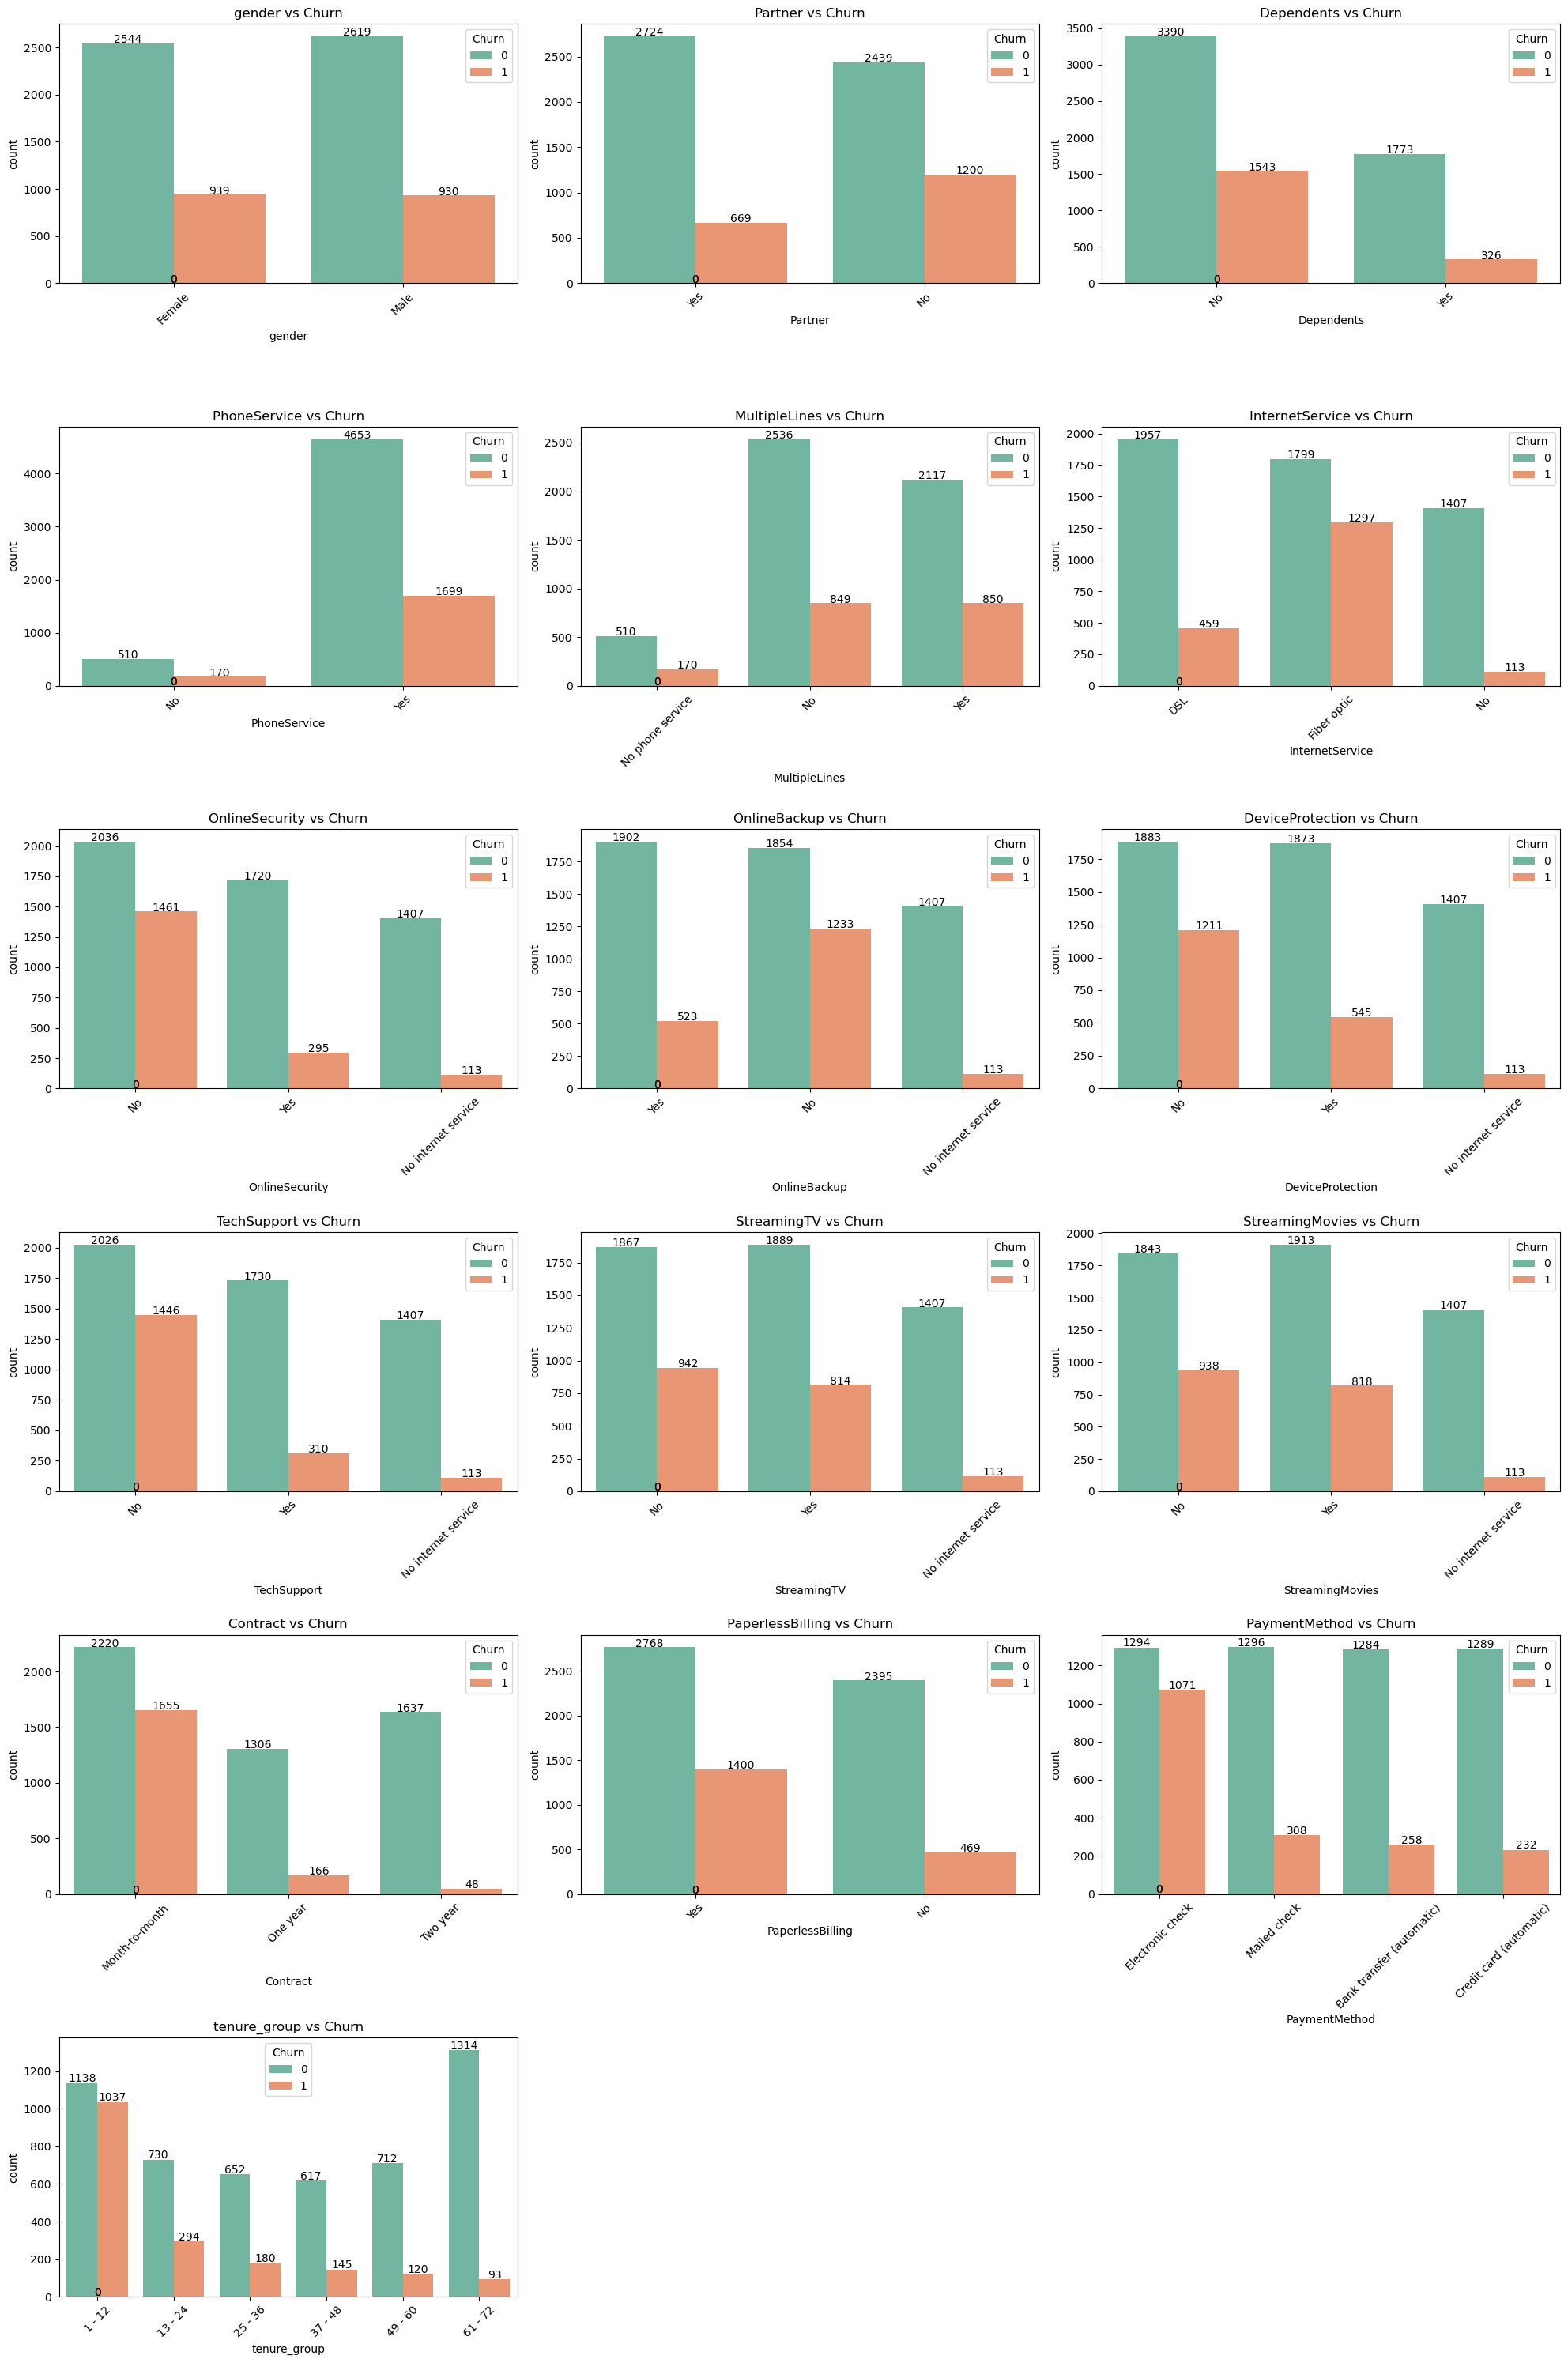

In [61]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "tenure_group"
]

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(x=col, hue="Churn", data=telco_data, palette="Set2", ax=ax)

    # Add percentages on top of bars
    total_counts = telco_data[col].value_counts().to_dict()
    for p in ax.patches:
        height = p.get_height()
        value = height / total_counts[p.get_x()] * 100 if p.get_x() in total_counts else 0
        ax.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', ha="center")

    ax.set_title(f"{col} vs Churn")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Plots:** Countplots for all categorical variables (`gender`, `Partner`, `Dependents`, `Contract`, `PaymentMethod`, `tenure_group`, `TechSupport`, etc.) vs `Churn`.

**Inferences:**
- **Contract Type:** Month-to-month customers have a **higher churn rate**, whereas 1-year and 2-year contracts show lower churn.  
- **Payment Method:** Customers using electronic checks show **slightly higher churn** than those using other payment methods.  
- **Tenure Group:** Newer customers (`0–12 months`) are more likely to churn than long-tenured customers.  
- **Optional Services:** 
  - Customers **without Tech Support (`No`)** have a **higher churn rate**; those with Tech Support tend to stay.  
  - Other optional services like `OnlineSecurity`, `StreamingTV`, etc., show minor variations, but generally, **subscribed customers churn less**.
- **Other categories (Partner, Dependents, Gender, PaperlessBilling, InternetService, etc.)** show minor differences in churn.

**Observation:**  
Categorical features help identify **customer groups with higher churn**, such as month-to-month contracts, new customers, those on electronic checks, and customers without Tech Support.


## 2-c Numerical vs Numerical

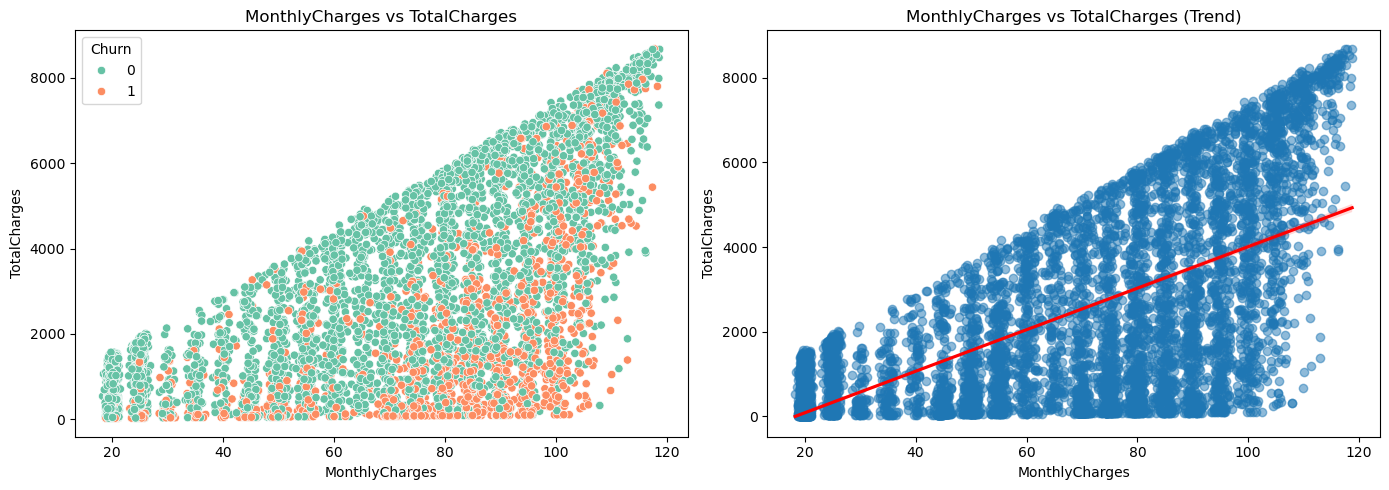

In [64]:
# Scatterplot + Regression line for continuous numerical variables

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# MonthlyCharges vs TotalCharges
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=telco_data, hue="Churn", palette="Set2", ax=axes[0])
axes[0].set_title("MonthlyCharges vs TotalCharges")
axes[0].set_xlabel("MonthlyCharges")
axes[0].set_ylabel("TotalCharges")

# With regression line
sns.regplot(x="MonthlyCharges", y="TotalCharges", data=telco_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title("MonthlyCharges vs TotalCharges (Trend)")
axes[1].set_xlabel("MonthlyCharges")
axes[1].set_ylabel("TotalCharges")

plt.tight_layout()
plt.show()


**Plots:** Regression plot for `MonthlyCharges` vs `TotalCharges`.

**Inferences:**
- **Positive correlation:** `TotalCharges` increases with `MonthlyCharges` — customers paying more per month accumulate higher total charges.  
- **Trend insight:** There is a cluster of churners at **high MonthlyCharges but low TotalCharges**, indicating new high-paying customers may churn early.  
- **Data distribution:** Most customers are concentrated in lower to mid ranges of MonthlyCharges and TotalCharges.

**Observation:**  
This plot confirms **spending patterns and correlation** between numerical features and highlights potential early churn risk for new, high-paying customers.

## Summary: 
- **Numerical vs Target:** Highlights differences in spending patterns between churners and retained customers.  
- **Categorical vs Target:** Shows which groups (contract type, tenure, payment method) are more likely to churn.  
- **Numerical vs Numerical:** Confirms correlations between features and helps spot clusters of high-risk customers.

#

# 3. Multivariate Analysis


#


### 3-a. Categorical vs Numerical vs Target

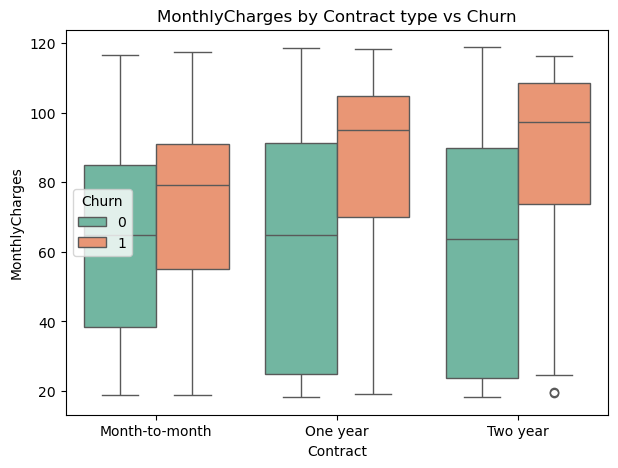

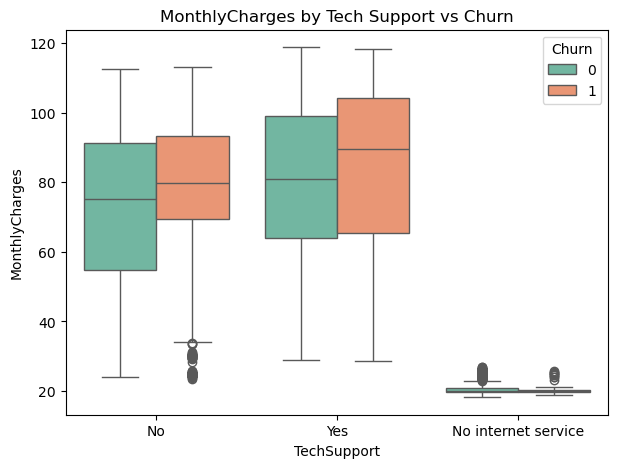

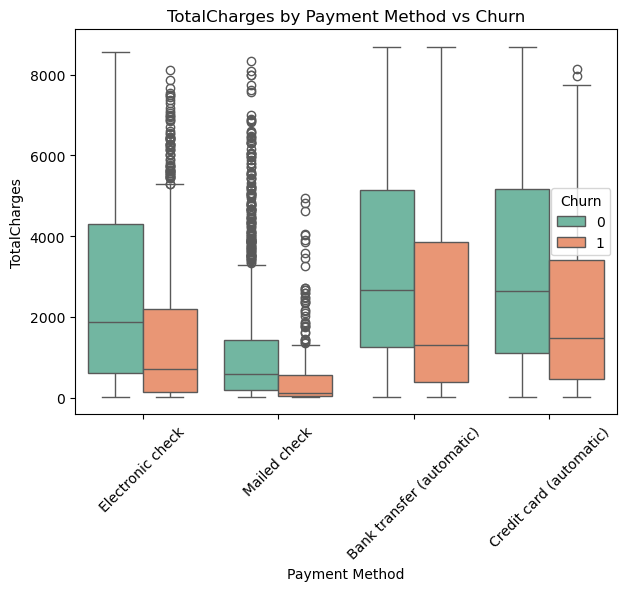

In [71]:
# Ensure TotalCharges is numeric
telco_data["TotalCharges"] = pd.to_numeric(telco_data["TotalCharges"], errors="coerce")
td = telco_data.dropna(subset=["TotalCharges"])

# --- 1. Categorical vs Numerical vs Target ---

# MonthlyCharges by Contract type vs Churn
plt.figure(figsize=(7,5))
sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=td, palette="Set2")
plt.title("MonthlyCharges by Contract type vs Churn")
plt.xlabel("Contract")
plt.ylabel("MonthlyCharges")
plt.show()

# MonthlyCharges by TechSupport vs Churn
plt.figure(figsize=(7,5))
sns.boxplot(x="TechSupport", y="MonthlyCharges", hue="Churn", data=td, palette="Set2")
plt.title("MonthlyCharges by Tech Support vs Churn")
plt.xlabel("TechSupport")
plt.ylabel("MonthlyCharges")
plt.show()

# TotalCharges by PaymentMethod vs Churn
plt.figure(figsize=(7,5))
sns.boxplot(x="PaymentMethod", y="TotalCharges", hue="Churn", data=td, palette="Set2")
plt.title("TotalCharges by Payment Method vs Churn")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("TotalCharges")
plt.show()

### 3-b. Categorical vs Categorical vs Target (Heatmap)

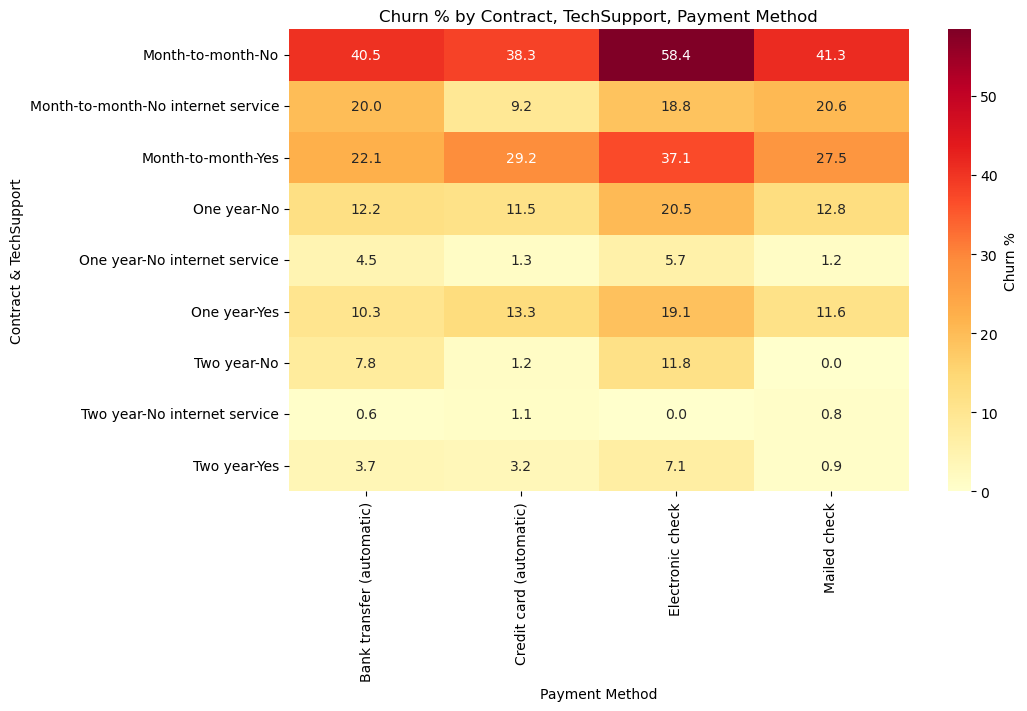

In [73]:
# Use only 3 most informative categorical features for clarity
cat_cols = ['Contract', 'TechSupport', 'PaymentMethod']

# Pivot table: churn percentage
heatmap_data = pd.crosstab(
    index=[td[col] for col in cat_cols[:-1]],  # rows: Contract + TechSupport
    columns=td[cat_cols[-1]],                  # columns: PaymentMethod
    values=td['Churn'],
    aggfunc='mean'
) * 100

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label':'Churn %'})
plt.title("Churn % by Contract, TechSupport, Payment Method")
plt.ylabel("Contract & TechSupport")
plt.xlabel("Payment Method")
plt.show()

## 3. Multivariate Analysis – Key Inferences

### 3-a. Categorical vs Numerical vs Target
- **MonthlyCharges by Contract type vs Churn**  
  - Month-to-month customers with **higher monthly charges** are more likely to churn.  
  - Long-term contracts (1-year, 2-year) show lower churn and less variation in charges.
  
- **MonthlyCharges by TechSupport vs Churn**  
  - Customers **without Tech Support** are more prone to churn, even at moderate monthly charges.  
  - Tech Support acts as a **protective factor** against churn.

- **TotalCharges by Payment Method vs Churn**  
  - Customers paying via **Electronic Check** have slightly higher churn than those using other methods.  
  - TotalCharges tend to be higher for retained customers, showing **longer-tenured customers** stay longer.

---

### 3-b. Categorical vs Categorical vs Target (Heatmap)
- **Contract × TechSupport × PaymentMethod**:  
  - **Highest churn** occurs among **Month-to-month customers without Tech Support using Electronic Checks**.  
  - **Lowest churn** is observed in **long-term contracts with Tech Support**, regardless of payment method.  
- The heatmap highlights **combinations of features** that lead to higher or lower churn, giving actionable insights for retention strategies.

---

### Summary 
- Multivariate analysis identifies **key risk groups** for churn.  
- Customers on **month-to-month contracts, lacking Tech Support, and using electronic checks** are most vulnerable.  
- These insights complement bivariate findings and help **target retention efforts effectively**.


#

# Key Insights from Telco Customer Churn Analysis

1. **Contract Type:** Month-to-month customers are most likely to churn; 1-year and 2-year contracts improve retention.
2. **Spending Behavior:** Churners generally have higher monthly charges but lower total charges, indicating new high-paying customers are at risk.
3. **Tech Support:** Customers without Tech Support are more prone to churn; adding support services can help retention.
4. **Payment Method:** Electronic Check users churn more than other payment types; automatic payments are linked to lower churn.
5. **Tenure:** Newer customers (0–12 months) have higher churn, whereas longer-tenured customers are more loyal.
6. **High-Risk Groups:** Month-to-month contract + No Tech Support + Electronic Check = highest churn risk.
7. **Actionable Takeaway:** Focus on retention strategies for high-risk groups, encourage longer contracts, and promote optional services like Tech Support.


## 

## Convert all the categorical variables into dummy variables

In [114]:
# Create dummy variables and avoid dummy trap
telco_data_dummies = pd.get_dummies(telco_data, drop_first=True)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,0,56.95,1889.50,0,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,0,53.85,108.15,1,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
3,0,42.30,1840.75,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False


In [118]:
# Select boolean columns (dummies) only
bool_cols = telco_data_dummies.select_dtypes('bool').columns

# Convert only bool columns to int
telco_data_dummies[bool_cols] = telco_data_dummies[bool_cols].astype(int)

telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [128]:
telco_data_dummies.to_csv(
    r"D:\Data Analytics\PORTFOLIO PROJECTS\End to End Machine Learning Project\self\telco_data_dummies.csv"
)